# KAGGLE - Heart Disease UCI (Dataset)

Dataset obtained from https://www.kaggle.com/ronitf/heart-disease-uci

Before we start working on the dataset, it is useful to try and visualise it a bit

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

#importing all of the data as a numpy array since it's a small dataset (~12KB)
data_set_labels = np.genfromtxt("heart-disease-uci/heart.csv",dtype=np.str,delimiter=",")[0]
data_set_values = np.genfromtxt("heart-disease-uci/heart.csv",dtype=np.float,delimiter=",",skip_header=1)
print(data_set_labels)
print(data_set_values)

['ï»¿age' 'sex' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalach' 'exang'
 'oldpeak' 'slope' 'ca' 'thal' 'target']
[[63.  1.  3. ...  0.  1.  1.]
 [37.  1.  2. ...  0.  2.  1.]
 [41.  0.  1. ...  0.  2.  1.]
 ...
 [68.  1.  0. ...  2.  3.  0.]
 [57.  1.  0. ...  1.  3.  0.]
 [57.  0.  1. ...  1.  2.  0.]]


Data contains the following variables: 

- `age`: age in years 
- `sex`: male(1)/female(0) 
- `cp`: chest pain type (1,2,3,4) 
- `trestbps`: resting blood pressure (in mmHg as measured on admission to the hospital) 
- `chol`: serum cholestoral in mg/dl 
- `fbs`: (fasting blood sugar > 120 mg/dl) (true(1)/false(0))
- `restecg`: resting electrocardiographic results 
- `thalach`: maximum heart rate achieved 
- `exang`: exercise induced angina (yes(1)/no(0))
- `oldpeak`: ST depression induced by exercise relative to rest 
- `slope`: the slope of the peak exercise ST segment 
- `ca`: number of major vessels (0,1,2,3) colored by flourosopy 
- `thal`: normal(3)/fixed defect(6)/reversable defect(7) 
- `target`: have disease or not (yes(1)/no(0))

There are 207 males and 96 females


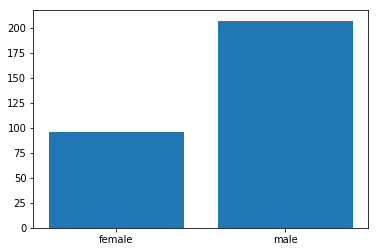

There are 138 healthy and 165 sick


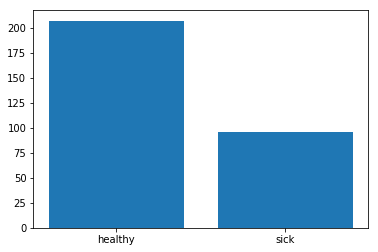

There are 258 with low and 45 high fasting blood sugar


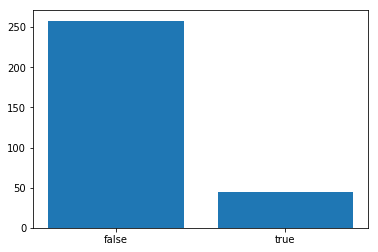

Scatter plot showing the heart rate/blood pressure values for healthy and sick people
(Ellipses show 1-sigma of the distribution)


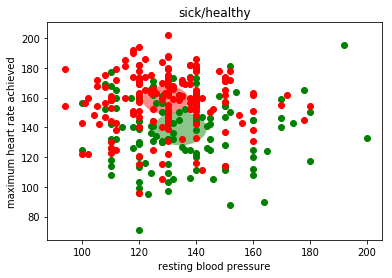

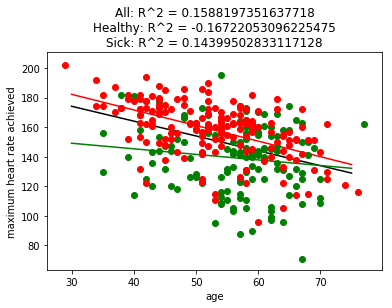

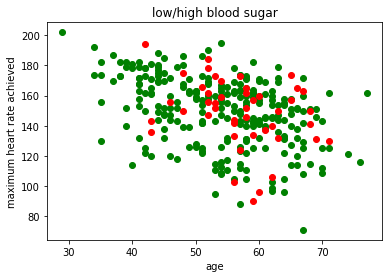

In [2]:
#Bar chart showing male-female split
male_female_split = np.array([np.sum(data_set_values[:,1]),data_set_values.shape[0]-np.sum(data_set_values[:,1])])
print("There are {} males and {} females".format(int(male_female_split[0]),int(male_female_split[1])))
plt.bar(["male","female"],male_female_split)
plt.show()

#Bar chart showing sick-healthy split
sick_healthy_split = np.array([data_set_values.shape[0]-np.sum(data_set_values[:,-1]),np.sum(data_set_values[:,-1])])
print("There are {} healthy and {} sick".format(int(sick_healthy_split[0]),int(sick_healthy_split[1])))
plt.bar(["healthy","sick"],male_female_split)
plt.show()

#Bar chart showing low-high fasting blood sugar split
fbs_split = np.array([data_set_values.shape[0]-np.sum(data_set_values[:,5]),np.sum(data_set_values[:,5])])
print("There are {} with low and {} high fasting blood sugar".format(int(fbs_split[0]),int(fbs_split[1])))
plt.bar(["false","true"],fbs_split)
plt.show()

#Scatter plot showing the heart rate/blood pressure values for healthy and sick people
print("Scatter plot showing the heart rate/blood pressure values for healthy and sick people\n(Ellipses show 1-sigma of the distribution)")

thalach_trestbps = np.array([data_set_values[:,3],data_set_values[:,7],data_set_values[:,-1]]).T
healthy_thalach_trestbps = np.array([])
sick_thalach_trestbps = np.array([])
for i in range(data_set_values.shape[0]):
    if thalach_trestbps[i,-1]==0:
        healthy_thalach_trestbps = np.append(healthy_thalach_trestbps,thalach_trestbps[i,:])
    else:
        sick_thalach_trestbps = np.append(sick_thalach_trestbps,thalach_trestbps[i,:])

healthy_thalach_trestbps = healthy_thalach_trestbps.reshape((int(sick_healthy_split[0]),3))[:,0:2]
sick_thalach_trestbps = sick_thalach_trestbps.reshape((int(sick_healthy_split[1]),3))[:,0:2]

avg_healthy_thalach_trestbps = np.average(healthy_thalach_trestbps,axis=0)
avg_sick_thalach_trestbps = np.average(sick_thalach_trestbps,axis=0)
std_healthy_thalach_trestbps = np.std(healthy_thalach_trestbps,axis=0)
std_sick_thalach_trestbps = np.std(sick_thalach_trestbps,axis=0)

ax = plt.gca()
ax.add_patch(Ellipse(xy=(avg_healthy_thalach_trestbps[0],avg_healthy_thalach_trestbps[1]), width=std_healthy_thalach_trestbps[0], height=std_healthy_thalach_trestbps[1],alpha=0.45,facecolor="green"))
ax.add_patch(Ellipse(xy=(avg_sick_thalach_trestbps[0],avg_sick_thalach_trestbps[1]), width=std_sick_thalach_trestbps[0], height=std_sick_thalach_trestbps[1],alpha=0.45,facecolor="red"))
plt.scatter(healthy_thalach_trestbps[:,0],healthy_thalach_trestbps[:,1],c="green",zorder=10)
plt.scatter(sick_thalach_trestbps[:,0],sick_thalach_trestbps[:,1],c="red",zorder=10)
plt.ylabel("maximum heart rate achieved")
plt.xlabel("resting blood pressure")
plt.title("sick/healthy")
plt.show()

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

age_thalach = np.array([data_set_values[:,0],data_set_values[:,7],data_set_values[:,-1]]).T

line = LinearRegression()
line.fit(age_thalach[:,0].reshape((len(age_thalach[:,0]),1)), age_thalach[:,1])

healthy_age_thalach = np.array([])
sick_age_thalach = np.array([])
for i in range(data_set_values.shape[0]):
    if age_thalach[i,-1]==0:
        healthy_age_thalach = np.append(healthy_age_thalach,age_thalach[i,:])
    else:
        sick_age_thalach = np.append(sick_age_thalach,age_thalach[i,:])

healthy_age_thalach = healthy_age_thalach.reshape((int(sick_healthy_split[0]),3))[:,0:2]
sick_age_thalach = sick_age_thalach.reshape((int(sick_healthy_split[1]),3))[:,0:2]

lineH = LinearRegression()
lineH.fit(healthy_age_thalach[:,0].reshape((len(healthy_age_thalach[:,0]),1)), healthy_age_thalach[:,1])

lineS = LinearRegression()
lineS.fit(sick_age_thalach[:,0].reshape((len(sick_age_thalach[:,0]),1)), sick_age_thalach[:,1])

plt.plot(np.array([[30],[75]]),line.predict(np.array([[30],[75]])),c="black")
plt.plot(np.array([[30],[75]]),lineH.predict(np.array([[30],[75]])),c="green")
plt.plot(np.array([[30],[75]]),lineS.predict(np.array([[30],[75]])),c="red")
plt.scatter(healthy_age_thalach[:,0],healthy_age_thalach[:,1],c="green",zorder=10)
plt.scatter(sick_age_thalach[:,0],sick_age_thalach[:,1],c="red",zorder=10)
plt.ylabel("maximum heart rate achieved")
plt.xlabel("age")
plt.title("All: R^2 = {}\nHealthy: R^2 = {}\nSick: R^2 = {}".format(r2_score(age_thalach[:,1],line.predict(age_thalach[:,0].reshape((len(age_thalach[:,0]),1)))),r2_score(healthy_age_thalach[:,1],line.predict(healthy_age_thalach[:,0].reshape((len(healthy_age_thalach[:,0]),1)))),r2_score(sick_age_thalach[:,1],line.predict(sick_age_thalach[:,0].reshape((len(sick_age_thalach[:,0]),1))))))
plt.show()

age_thalach_fbs = np.array([data_set_values[:,0],data_set_values[:,7],data_set_values[:,5]]).T

lo = np.array([])
hi = np.array([])
for i in range(data_set_values.shape[0]):
    if age_thalach_fbs[i,-1]==0:
        lo = np.append(lo,age_thalach_fbs[i,:])
    else:
        hi = np.append(hi,age_thalach_fbs[i,:])

lo = lo.reshape((int(fbs_split[0]),3))[:,0:2]
hi = hi.reshape((int(fbs_split[1]),3))[:,0:2]

plt.scatter(lo[:,0],lo[:,1],c="green",zorder=10)
plt.scatter(hi[:,0],hi[:,1],c="red",zorder=10)
plt.ylabel("maximum heart rate achieved")
plt.xlabel("age")
plt.title("low/high blood sugar")
plt.show()

The blood sugar scatter plot was plotted to check if the scientifically supported correlation of maximum heart rate and age with caloric burn.

As a starting off point, we will try a SVM classifying using the heart rate/blood pressure values, heart rate/blood pressure/age/cholesterol values, and all values (the first two options are there to test if the input space can be minimised). The choice for SVMs was made since they tend to perform very well on relatively small datasets.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

print("Testing SVM accuracy with heart rate/blood pressure values\n")
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(thalach_trestbps[:,1:-1], thalach_trestbps[:,-1], test_size=0.3,random_state=109) # 70% training and 30% test

#Create a linear svm Classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (linear):",metrics.accuracy_score(y_test, y_pred))

#Create a rbf svm Classifier
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (rbf):",metrics.accuracy_score(y_test, y_pred))

#Create a sigmoid svm Classifier
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (sigmoid):",metrics.accuracy_score(y_test, y_pred))

print("\nTesting SVM accuracy with heart rate/blood pressure/age/cholesterol values\n")

#attempt with more variables
age_trestbps_chol_thalach = np.array([data_set_values[:,0],data_set_values[:,3],data_set_values[:,4],data_set_values[:,7],data_set_values[:,-1]]).T

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(age_trestbps_chol_thalach[:,1:-1], age_trestbps_chol_thalach[:,-1], test_size=0.2,random_state=109) # 70% training and 30% test

#Create a linear svm Classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (linear):",metrics.accuracy_score(y_test, y_pred))

#Create a rbf svm Classifier
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (rbf):",metrics.accuracy_score(y_test, y_pred))

#Create a sigmoid svm Classifier
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (sigmoid):",metrics.accuracy_score(y_test, y_pred))

print("\nTesting SVM accuracy with all values\n")

#attempt with all variables

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_set_values[:,1:-1], data_set_values[:,-1], test_size=0.3,random_state=109) # 70% training and 30% test

#Create a linear svm Classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (linear):",metrics.accuracy_score(y_test, y_pred))

#Create a rbf svm Classifier
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (rbf):",metrics.accuracy_score(y_test, y_pred))

#Create a sigmoid svm Classifier
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (sigmoid):",metrics.accuracy_score(y_test, y_pred))

Testing SVM accuracy with heart rate/blood pressure values

Accuracy (linear): 0.7362637362637363
Accuracy (rbf): 0.6043956043956044
Accuracy (sigmoid): 0.5604395604395604

Testing SVM accuracy with heart rate/blood pressure/age/cholesterol values

Accuracy (linear): 0.7377049180327869
Accuracy (rbf): 0.5901639344262295
Accuracy (sigmoid): 0.5901639344262295

Testing SVM accuracy with all values

Accuracy (linear): 0.9010989010989011
Accuracy (rbf): 0.5714285714285714
Accuracy (sigmoid): 0.5604395604395604


Clearly, the Linear-SVM with all values greatly superseeded the rest with an accuracy of ~90.1%. For comparison, we will try a Neural Network with layer sizes 100,100,100 and we should expect to get a rather low accuracy given the small amount of data. 

In [4]:
from sklearn.neural_network import MLPClassifier

print("Testing MLP with all values")
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data_set_values[:,1:-1], data_set_values[:,-1], test_size=0.2,random_state=109) # 70% training and 30% test

clf = MLPClassifier(max_iter=2000, activation='logistic',solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100, 100), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy (MLP):",metrics.accuracy_score(y_test, y_pred))

Testing MLP with all values
Accuracy (MLP): 0.7213114754098361
